# MLAI_BScCompIT_Sept20_CA3
## Caue Duarte
## 2017228

Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset does not contain the name of each feature, but are present in the data dictionary. These names are being manualy passed when loading the dataset.

In [3]:
data = pd.read_csv("glass_data.csv", names=["id","Refractive_Index","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type_Of_Glass"])

First look at the dataset

In [107]:
data.head()

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


By using the `pd.info()` method we verify the datatype of each feature. The number of data points (rows) in the dataset and number of features (columns) can also be seen, making it possible to derive the shape of the dataset (that information could have been directly accessed by using the "pd.shape" property).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                214 non-null    int64  
 1   Refractive_Index  214 non-null    float64
 2   Na                214 non-null    float64
 3   Mg                214 non-null    float64
 4   Al                214 non-null    float64
 5   Si                214 non-null    float64
 6   K                 214 non-null    float64
 7   Ca                214 non-null    float64
 8   Ba                214 non-null    float64
 9   Fe                214 non-null    float64
 10  Type_Of_Glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


The `pd.describe()` method can be used to get some basic statistic data about the dataset. This give an initial sense of variance in each one of the features, which might indicate the need for scalling the data.

In [12]:
data.describe()

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The `pd.isna()` returns a boolean object with the same dimensions as the original data frame to represent any missing data. By using it with the `sum()` method the number of missing data points for each one of the features can be counted. In this case there is no missing data in the data set.

In [14]:
data.isna().sum()

id                  0
Refractive_Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type_Of_Glass       0
dtype: int64

Before moving forward, dropping the `id` column from the dataset will improve the next steps. Considering the `id` is only a sequence of numbers to identify each data point, it has no real relationship with the rest of the data.

In [4]:
data.drop(['id'], inplace=True, axis=1)

Considering that is extremelly unlikely for two data points to have exactly the same chemical composition, it is safe to assume that if that happens, the data got duplicated. In that case we should drop any copies to avoid creating bias in the data.

In [4]:
data = data.drop_duplicates()

Visualizing the distribution in the `Type_Of_Glass` feature can also show interesting patterns in the data. It is clear that most of the data points correspond to either  "buildingwindowsfloatprocessed" and "buildingwindowsnonfloatprocessed", with "vehiclewindowsfloatprocessed",  "containers", "tableware" and "headlamps" having a much lower count. Most importantly, there was no data regarding "containers". This is great information to have when assessing the model in the next steps, since no prediction should return a "container" classification. The visualization also shows that the dataset is very unbalanced.

Text(0.5, 1.0, 'Count of samples of each type of glass')

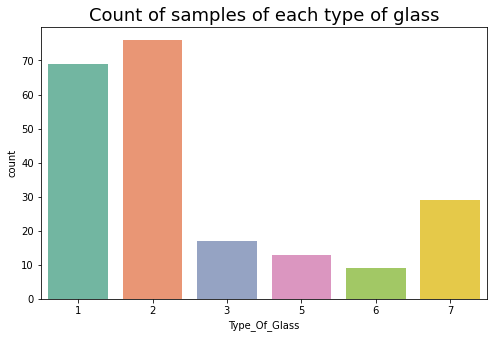

In [70]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(data=data, x='Type_Of_Glass', palette = "Set2")
plt.title("Count of samples of each type of glass", fontsize=18)

Finally, a better way to indicate correlation between glass composition and the type of glass produced is to generate a barplot showing each feature against the `Type_of_glass` feaure. The plots indicate that Refractive Index, Na, Si and Ca measures present low to no influence on the Type of glass.

Glass with high Mg content, on the other hand, tends to be used more in buildings (type 1 and 2) and cars (type 3). Glass with high K content is predominantly used in containers, while most glass used for headlamps showed a high Ba content. High Fe indicate uses other than Tableware and containers.

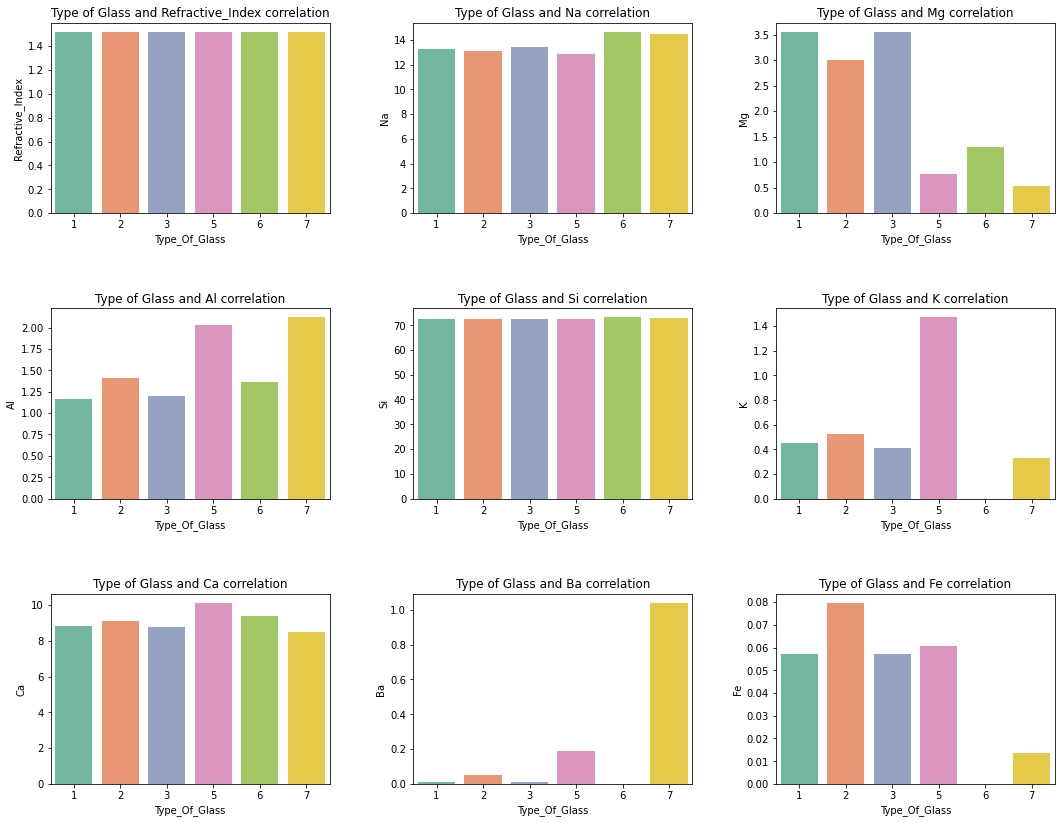

In [26]:
columns = ['Refractive_Index','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.rcParams['figure.figsize'] = [18, 14]
n=0
for i in columns:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
    plot = sns.barplot(data = data,
                       x = "Type_Of_Glass",
                       y = i,
                       ci = None,
                       palette = "Set2").set_title('Type of Glass and %s correlation' %i)
    plt.xlabel = ('Type_Of_Glass')
    plt.ylabel = ('{i}')
plt.show()

## Model Implementation and justification

For this classification task, the best Neural Network type to be used is a Artificial Neural Network (ANN). ANNs are ideal when the data is non-sequential and tabular, like the dataset being analyzed. Furthermore, if the model has a good accuracy without the addition of many hidden layers, this will reduce the chances of vanishing and exploding gradient that sometimes affect this type of neural network (Pai, 2020).

Once again, we load a few dependencies.

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

The dataset has to be separated between the independent and target variable. Since the goal is to predict what use a glass sample will most likely have based on its chemical composition and refractive index, those will be the independent variables while the `Type_of_Glass` will be the target variable. The `.values` attribute is used so the data is in a Nunpy array format.

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

The data is then split between the training set and the testing set. As testbed, the training set will be 80% of the original data, while the test set will be 20%. A random seed will also be selected so the split is consistent in case it has to be done again.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

The target variables still need to be converted to categorical data to be in the right format for the model. 

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Loading model's dependencies.

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Input 
from keras.losses import CategoricalCrossentropy

For the first version of the model, a sequential model with a initial Input layer with 9 nodes (since there are 9 features in the independent data), followed by four Dense layers with 100 nodes each and Rectified Linear Unit activation functions, and a last Dense layer with 8 nodes and a Softmax activation function that will return the output of the model. This architecture was chosen mainly because the dataset is small enough that adding multiple layers with hundreds of nodes does not increase the use of computational resources by a large ammount. This means even if the a simpler architecture would be able to achieve a similar accuracy there isn't much to lose by introducing more layers and nodes.

As for the activation functions, `relu` can be used since there data is always positive and is a good first option (Jain, 2019). The last Dense layer will use a `softmax` function that will use the weights of the nodes to estimate the probability the input has of being each specific class. In this case, this layer will output the prediction in an one-hot encoded format (Koech, 2020).

In [32]:
model = Sequential()
model.add(Input(9,))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 8,activation = 'softmax'))

When compiling the model, we chose Adam algorithm as optimizer since it is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters" (Kingma & Ba, 2014). As for the loss function, considering the problem is a multi-class classification, the model should use Cross-entropy (Martinek, 2020). 

In [34]:
model.compile(optimizer = 'adam',loss = CategoricalCrossentropy(from_logits=True),metrics = ['categorical_accuracy'])

Finally, model is finally trained using the data. Initially the data will go through the model 200 times, once again as testbed. After training, the model will be evaluated and its architecture and training will be changed if necessary. 

In [35]:
model.fit(X_train,y_train,epochs = 200)
Test_Loss,Test_Accuracy = model.evaluate(X_test,y_test)
print('Test Loss : ',Test_Loss,'\nTest Accuracy',Test_Accuracy)

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 0.9821 - categorical_accuracy: 0.5729
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 1.0089 - categorical_accuracy: 0.5469
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9833 - categorical_accuracy: 0.5779
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8880 - categorical_accuracy: 0.6522
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9162 - categorical_accuracy: 0.5969
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9716 - categorical_accuracy: 0.5721
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8583 - categorical_accuracy: 0.5925
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8861 - categorical_accuracy: 0.5759
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8537 - categorical_accuracy: 0.5644
Epoch 10/200
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 0.7777 - categorical_accuracy: 0.5440
Epoch 76/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7923 - categorical_accuracy: 0.6648
Epoch 77/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8058 - categorical_accuracy: 0.5804
Epoch 78/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7551 - categorical_accuracy: 0.7219
Epoch 79/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7668 - categorical_accuracy: 0.6375
Epoch 80/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7609 - categorical_accuracy: 0.6794
Epoch 81/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7257 - categorical_accuracy: 0.7256
Epoch 82/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7756 - categorical_accuracy: 0.6257
Epoch 83/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7467 - categorical_accuracy: 0.6623
Epoch 84/200
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.7616 - categorical_accuracy: 0.6090
Epoch 150/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7503 - categorical_accuracy: 0.6883
Epoch 151/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7014 - categorical_accuracy: 0.6500
Epoch 152/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7097 - categorical_accuracy: 0.6876
Epoch 153/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7324 - categorical_accuracy: 0.6097
Epoch 154/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7740 - categorical_accuracy: 0.6991
Epoch 155/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6569 - categorical_accuracy: 0.6518
Epoch 156/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7456 - categorical_accuracy: 0.6534
Epoch 157/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7268 - categorical_accuracy: 0.6372
Epoch 158/200
6

As the output shows, the model had an accuracy of 62,79%, and presented a high loss of 1.277. This can be caused because the training dataset is highly unbalanced, which is possibily causing a lot of bias in the model. To address these concerns, we will use the "Synthetic Minority Oversampling Technique" or "SMOTE" (Brownlee, 2020). Once the data is balanced, it can be split in training/testing data and the model can be trained again.

In [5]:
from imblearn.over_sampling import SMOTE

After loading the dependency, it is used to balance the independent and target data.

In [7]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

The data is prepared for training once more.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

And finally the new model can be trained. It is important to mention that another Dense layer with 100 nodes was added, and the number of epochs was increased to 400. Both changes were made in the hope the model's accuracy increases.

In [16]:
model = Sequential()
model.add(Input(9,))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 8,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = CategoricalCrossentropy(from_logits=True),metrics = ['categorical_accuracy'])
model.fit(X_train,y_train,epochs = 400)
Test_Loss,Test_Accuracy = model.evaluate(X_test,y_test)
print('Test Loss : ',Test_Loss,'\nTest Accuracy',Test_Accuracy)

Epoch 1/300
12/12 [==============================] - 1s 2ms/step - loss: 2.5295 - categorical_accuracy: 0.1092
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1.9012 - categorical_accuracy: 0.1112
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1.7999 - categorical_accuracy: 0.2046
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1.7660 - categorical_accuracy: 0.3001
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1.7523 - categorical_accuracy: 0.1986
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1.6462 - categorical_accuracy: 0.3079
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1.5600 - categorical_accuracy: 0.3603
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1.4821 - categorical_accuracy: 0.4543
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1.4298 - categorical_accuracy: 0.3629
E

12/12 [==============================] - 0s 2ms/step - loss: 0.5756 - categorical_accuracy: 0.7435
Epoch 75/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5828 - categorical_accuracy: 0.7227
Epoch 76/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5323 - categorical_accuracy: 0.7334
Epoch 77/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5217 - categorical_accuracy: 0.7436
Epoch 78/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5355 - categorical_accuracy: 0.7374
Epoch 79/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5407 - categorical_accuracy: 0.7485
Epoch 80/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5786 - categorical_accuracy: 0.7325
Epoch 81/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5621 - categorical_accuracy: 0.7408
Epoch 82/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5678 - categorical_accuracy: 0.7450
Epoch

12/12 [==============================] - 0s 2ms/step - loss: 0.3718 - categorical_accuracy: 0.8305
Epoch 147/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3867 - categorical_accuracy: 0.8443
Epoch 148/300
12/12 [==============================] - 0s 2ms/step - loss: 0.4278 - categorical_accuracy: 0.8015
Epoch 149/300
12/12 [==============================] - 0s 2ms/step - loss: 0.4380 - categorical_accuracy: 0.8112
Epoch 150/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3746 - categorical_accuracy: 0.8380
Epoch 151/300
12/12 [==============================] - 0s 2ms/step - loss: 0.4028 - categorical_accuracy: 0.8145
Epoch 152/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5062 - categorical_accuracy: 0.7560
Epoch 153/300
12/12 [==============================] - 0s 2ms/step - loss: 0.4096 - categorical_accuracy: 0.8151
Epoch 154/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3748 - categorical_accuracy: 0.82

12/12 [==============================] - 0s 2ms/step - loss: 0.4133 - categorical_accuracy: 0.8265
Epoch 219/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5054 - categorical_accuracy: 0.7692
Epoch 220/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3630 - categorical_accuracy: 0.8177
Epoch 221/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3535 - categorical_accuracy: 0.8337
Epoch 222/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3920 - categorical_accuracy: 0.8193
Epoch 223/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3363 - categorical_accuracy: 0.8459
Epoch 224/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3271 - categorical_accuracy: 0.8550
Epoch 225/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3168 - categorical_accuracy: 0.8677
Epoch 226/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3720 - categorical_accuracy: 0.84

12/12 [==============================] - 0s 2ms/step - loss: 0.2827 - categorical_accuracy: 0.8861
Epoch 291/300
12/12 [==============================] - 0s 2ms/step - loss: 0.2626 - categorical_accuracy: 0.8817
Epoch 292/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3598 - categorical_accuracy: 0.8564
Epoch 293/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3142 - categorical_accuracy: 0.8340
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 0.2668 - categorical_accuracy: 0.8944
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3154 - categorical_accuracy: 0.8703
Epoch 296/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3376 - categorical_accuracy: 0.8376
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 0.4695 - categorical_accuracy: 0.7992
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 0.3222 - categorical_accuracy: 0.87

## References

Brownlee, J. (2020). *SMOTE for Imbalanced Classification with Python*. [online] Machine Learning Mastery. Available at: < https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ > [Accessed 26 May 2021].

Jain, V. (2019). *Everything you need to know about “Activation Functions” in Deep learning models*. [online] Towards Data Science. Available at: < https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253 >. [Accessed 26 May 2021].

Kingma, D.P. and Ba, J. (2014). *Adam: A method for stochastic optimization*. arXiv preprint arXiv:1412.6980.

Koech, K. E. (2020). *Softmax Activation Function — How It Actually Works*. [online] Towards Data Science. Available at: < https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78 >. [Accessed 26 May 2021].

Martinek, V. (2020). *Cross-entropy for classification*. [online] Towards Data Science. Available at: < https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451 >. [Accessed 26 May 2021].

Pai, A. (2020). *CNN vs. RNN vs. ANN – Analyzing 3 Types of Neural Networks in Deep Learning*. [online] Analytics Vidhya. Available at: < https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/ >. [Accessed 26 May 2021].